In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [596]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/stethography vs r-r values/4000-remaining.csv")

In [597]:
df.head(1000)

,stethography,rrvalues
0,-1.5132,0.663
1,-1.0615,0.667
2,0.8604,0.675
3,1.7020,0.682
4,0.9992,0.684
...,...,...
995,-0.2697,0.781
996,1.1453,0.758
997,1.4178,0.747
998,0.8218,0.761


In [598]:
df.describe()

,stethography,rrvalues
count,1112.000000,1112.000000
mean,0.154311,0.719023
std,1.052959,0.065043
min,-3.102200,0.583000
25%,-0.732675,0.671000
50%,0.152300,0.705000
75%,1.058475,0.767000
max,5.271700,1.409000


In [599]:
df.shape


(1112, 2)

In [600]:
cdf = df[['stethography','rrvalues']]
cdf.head(5)

,stethography,rrvalues
0,-1.5132,0.663
1,-1.0615,0.667
2,0.8604,0.675
3,1.7020,0.682
4,0.9992,0.684


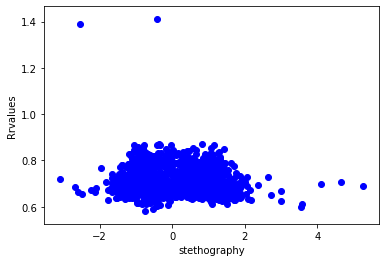

In [601]:
#graph of SNO vs r-r values

plt.scatter(cdf.stethography, cdf.rrvalues,color='blue')
plt.xlabel('stethography')
plt.ylabel('Rrvalues')
plt.show()

In [602]:
#splitting our data in 80-20 ratio for regression

In [603]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

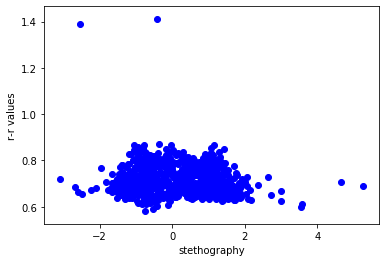

In [604]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.stethography, train.rrvalues,  color='blue')
plt.xlabel("stethography")
plt.ylabel("r-r values")
plt.show()

In [605]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['stethography']])
train_y = np.asanyarray(train[['rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.00728968]]
Intercept:  [0.71962283]


Text(0, 0.5, 'r-r values')

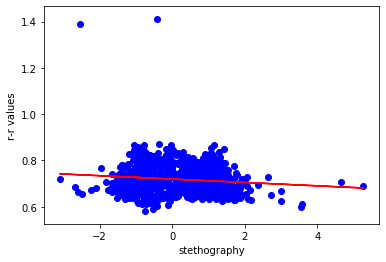

In [606]:
plt.scatter(train.stethography, train.rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("stethography")
plt.ylabel("r-r values")

In [607]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['stethography']])
test_y = np.asanyarray(test[['rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: -72.67


In [608]:
#using polynomial regression

In [609]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['stethography']])
train_y = np.asanyarray(train[['rrvalues']])

test_x = np.asanyarray(test[['stethography']])
test_y = np.asanyarray(test[['rrvalues']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.00000000e+00, -1.51320000e+00,  2.28977424e+00],
       [ 1.00000000e+00, -1.06150000e+00,  1.12678225e+00],
       [ 1.00000000e+00,  8.60400000e-01,  7.40288160e-01],
       ...,
       [ 1.00000000e+00,  1.04530000e+00,  1.09265209e+00],
       [ 1.00000000e+00, -4.61000000e-02,  2.12521000e-03],
       [ 1.00000000e+00, -7.18500000e-01,  5.16242250e-01]])

In [610]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         -0.00503474 -0.00426727]]
Intercept:  [0.72421299]


Text(0, 0.5, 'r-rvalues')

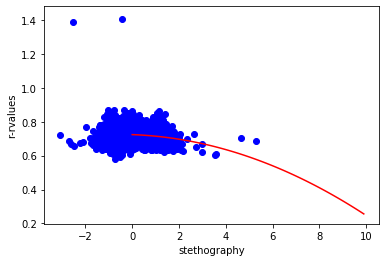

In [611]:
#plotting the polynomial regression
plt.scatter(train.stethography, train.rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("stethography")
plt.ylabel("r-rvalues")

In [612]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: -49.54
